# Execução dos Algoritmos de K-Modes e K-Prototype

- Utilizando dados da CAT 2018-2021
- Pré-processamento apenas utilizando o módulo `tratamento_dados.py`

In [5]:
import tratamento_dados as td
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Preparação dos dados

- Carregamento de Dados
- Filtragrem 
- Correção de dados

In [2]:
df = td.executa_df_simplificado()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64528 entries, 0 to 64527
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Agente  Causador  Acidente   64126 non-null  object
 1   CBO                          64048 non-null  object
 2   CBO.1                        62218 non-null  object
 3   CID-10                       63974 non-null  object
 4   CID-10.1                     62971 non-null  object
 5   CNAE2.0 Empregador           64528 non-null  int64 
 6   CNAE2.0 Empregador.1         64510 non-null  object
 7   Emitente CAT                 64528 non-null  object
 8   Espécie do benefício         64528 non-null  object
 9   Filiação Segurado            64525 non-null  object
 10  Indica acidente              64528 non-null  object
 11  Munic Empr                   64523 non-null  object
 12  Natureza da Lesão            64315 non-null  object
 13  Origem de Cadastramento CAT  64

In [4]:
df.head(2)

,Agente Causador Acidente,CBO,CBO.1,CID-10,CID-10.1,CNAE2.0 Empregador,CNAE2.0 Empregador.1,Emitente CAT,Espécie do benefício,Filiação Segurado,...,Munic Empr,Natureza da Lesão,Origem de Cadastramento CAT,Parte Corpo Atingida,Sexo,Tipo do Acidente,UF Munic. Acidente,UF Munic. Empregador,Data Despacho Benefício,Data Acidente.1
0,Veiculo Rodoviario M,732130,732130-Inst.-Reparad,S400,S40.0 Contusao do Om,4329,Obras de Instalacoes,Empregador,Pa,Empregado,...,431490-Porto Alegre,"Contusao, Esmagament",Internet,Braco (Entre O Punho,Masculino,Típico,None,Rio Grande do Sul,None,10/04/2018
1,Chao - Superficie Ut,717020,717020-Servente de O,S728,S72.8 Frat de Outr P,4213,Obras de Urbanizacao,Empregador,Pa,Empregado,...,310620-Belo Horizont,Fratura,Internet,Quadris (Inclusive P,Masculino,Típico,Rondônia,Minas Gerais,None,22/05/2018


### Primeiras observações
- CBO será excluído, embora seja um objeto o modelo tratará como numeral, o que irá criar um erro
- Colunas relacionada ao CNAE serão usados para filtrar e em seguida excluídas, visto que estamos usando apenas dados de construção civil
- A coluna Data Despacho Benefício será excluída pela quantidade de valores nulos que possui

In [6]:
df_categorico = df.loc[df['CNAE2.0 Empregador'] == 4120, :]
df_categorico.drop(['CBO','CNAE2.0 Empregador.1','CNAE2.0 Empregador', 'Data Despacho Benefício'], inplace=True, axis=1)
df_categorico.dropna(axis=0, how='any', inplace=True)
df_categorico.reset_index(drop=True, inplace=True)

In [7]:
df_categorico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15910 entries, 0 to 15909
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Agente  Causador  Acidente   15910 non-null  object
 1   CBO.1                        15910 non-null  object
 2   CID-10                       15910 non-null  object
 3   CID-10.1                     15910 non-null  object
 4   Emitente CAT                 15910 non-null  object
 5   Espécie do benefício         15910 non-null  object
 6   Filiação Segurado            15910 non-null  object
 7   Indica acidente              15910 non-null  object
 8   Munic Empr                   15910 non-null  object
 9   Natureza da Lesão            15910 non-null  object
 10  Origem de Cadastramento CAT  15910 non-null  object
 11  Parte Corpo Atingida         15910 non-null  object
 12  Sexo                         15910 non-null  object
 13  Tipo do Acidente             15

In [9]:
from kmodes.kmodes import KModes

# Execução K-Modes para todos atributos
# Elbow curve to find optimal K
cost = []
K = range(1,42, 2)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 5, verbose=1)
    kmode.fit_predict(df_categorico)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 132364.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 132364.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 132364.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 132364.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 132364.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2936, cost: 120759.0
Run 1, iteration: 2/100, moves: 300, cost: 120759.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 5069, cost: 117944.0
Run 2, ite

Starting iterations...
Run 2, iteration: 1/100, moves: 6010, cost: 107007.0
Run 2, iteration: 2/100, moves: 753, cost: 106960.0
Run 2, iteration: 3/100, moves: 0, cost: 106960.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 4462, cost: 106582.0
Run 3, iteration: 2/100, moves: 1273, cost: 106582.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 6306, cost: 106091.0
Run 4, iteration: 2/100, moves: 267, cost: 106091.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 4289, cost: 105467.0
Run 5, iteration: 2/100, moves: 293, cost: 105467.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4749, cost: 105299.0
Run 1, iteration: 2/100, moves: 678, cost: 105242.0
Run 1, iteration: 3/100, moves: 23, cost: 105242.0
Init: in

Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 4987, cost: 100427.0
Run 5, iteration: 2/100, moves: 953, cost: 100088.0
Run 5, iteration: 3/100, moves: 198, cost: 100061.0
Run 5, iteration: 4/100, moves: 25, cost: 100061.0
Best run was number 5
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4236, cost: 101379.0
Run 1, iteration: 2/100, moves: 322, cost: 101375.0
Run 1, iteration: 3/100, moves: 3, cost: 101375.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 5839, cost: 100822.0
Run 2, iteration: 2/100, moves: 1380, cost: 100654.0
Run 2, iteration: 3/100, moves: 33, cost: 100649.0
Run 2, iteration: 4/100, moves: 2, cost: 100649.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 6031, cost: 99763.0
Run 3, iteration: 2/100, moves: 1437, cost: 99624.0
Run 3, iterat

### Plotagem do método cotovelo

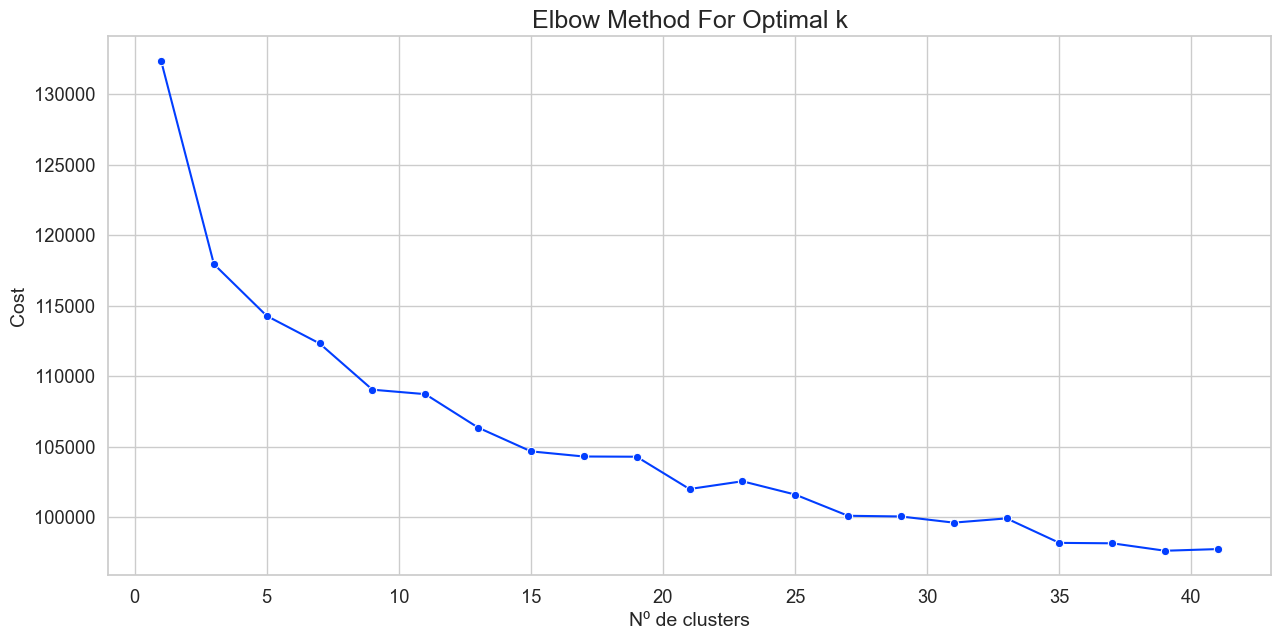

In [12]:
sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)
plt.figure(figsize=(15,7))

ax = sns.lineplot(x=K, y=cost, marker="o", dashes=False)
ax.set_title('Elbow Method For Optimal k', fontsize=18)
ax.set_xlabel('Nº de clusters', fontsize=14)
ax.set_ylabel('Cost', fontsize=14)

hoje = datetime.date.today()
plt.show()

In [13]:
df = td.executa_df()

In [14]:
df_prototype = df.loc[df['CNAE2.0 Empregador'] == 4120, :]
df_prototype.drop(['CNAE2.0 Empregador.1','CNAE2.0 Empregador', 'Data Despacho Benefício'], inplace=True, axis=1)
df_prototype.dropna(axis=0, how='any', inplace=True)
df_prototype.reset_index(drop=True, inplace=True)

In [15]:
df_prototype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15797 entries, 0 to 15796
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Agente  Causador  Acidente   15797 non-null  object 
 1   CBO                          15797 non-null  object 
 2   CBO.1                        15797 non-null  object 
 3   CID-10                       15797 non-null  object 
 4   CID-10.1                     15797 non-null  object 
 5   Emitente CAT                 15797 non-null  object 
 6   Espécie do benefício         15797 non-null  object 
 7   Filiação Segurado            15797 non-null  object 
 8   Indica acidente              15797 non-null  object 
 9   Munic Empr                   15797 non-null  object 
 10  Natureza da Lesão            15797 non-null  object 
 11  Origem de Cadastramento CAT  15797 non-null  object 
 12  Parte Corpo Atingida         15797 non-null  object 
 13  Sexo            

In [16]:
categorical_index = [df_prototype.columns.get_loc(col) for col in list(df_prototype.select_dtypes('object').columns)]

In [17]:
from kmodes.kprototypes import KPrototypes

# Execução K-Modes para todos atributos
# Elbow curve to find optimal K
cost = []
K = range(1,42, 4)
for num_clusters in list(K):
    prototype = KPrototypes(n_clusters=num_clusters, init = "Huang", random_state=42)
    kmode.fit_predict(df_categorico, categorical=categorical_index)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3976, cost: 98431.0
Run 1, iteration: 2/100, moves: 887, cost: 98200.0
Run 1, iteration: 3/100, moves: 164, cost: 98200.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 5483, cost: 98074.0
Run 2, iteration: 2/100, moves: 636, cost: 97857.0
Run 2, iteration: 3/100, moves: 65, cost: 97855.0
Run 2, iteration: 4/100, moves: 0, cost: 97855.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 5649, cost: 98554.0
Run 3, iteration: 2/100, moves: 1309, cost: 98276.0
Run 3, iteration: 3/100, moves: 71, cost: 98276.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 5547, cost: 99167.0
Run 4, iteration: 2/100, moves: 1089, cost: 98264.0
Run 4, iteration: 3/100, moves: 378, cost: 98202.0
Run 4, iteratio

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4986, cost: 99750.0
Run 1, iteration: 2/100, moves: 496, cost: 99609.0
Run 1, iteration: 3/100, moves: 68, cost: 99609.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 6620, cost: 99200.0
Run 2, iteration: 2/100, moves: 1821, cost: 98548.0
Run 2, iteration: 3/100, moves: 425, cost: 98544.0
Run 2, iteration: 4/100, moves: 1, cost: 98544.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 5572, cost: 99023.0
Run 3, iteration: 2/100, moves: 886, cost: 98921.0
Run 3, iteration: 3/100, moves: 33, cost: 98921.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 5545, cost: 98434.0
Run 4, iteration: 2/100, moves: 702, cost: 98322.0
Run 4, iteration: 3/100, moves: 18, cost: 98322.0
Init: initializin

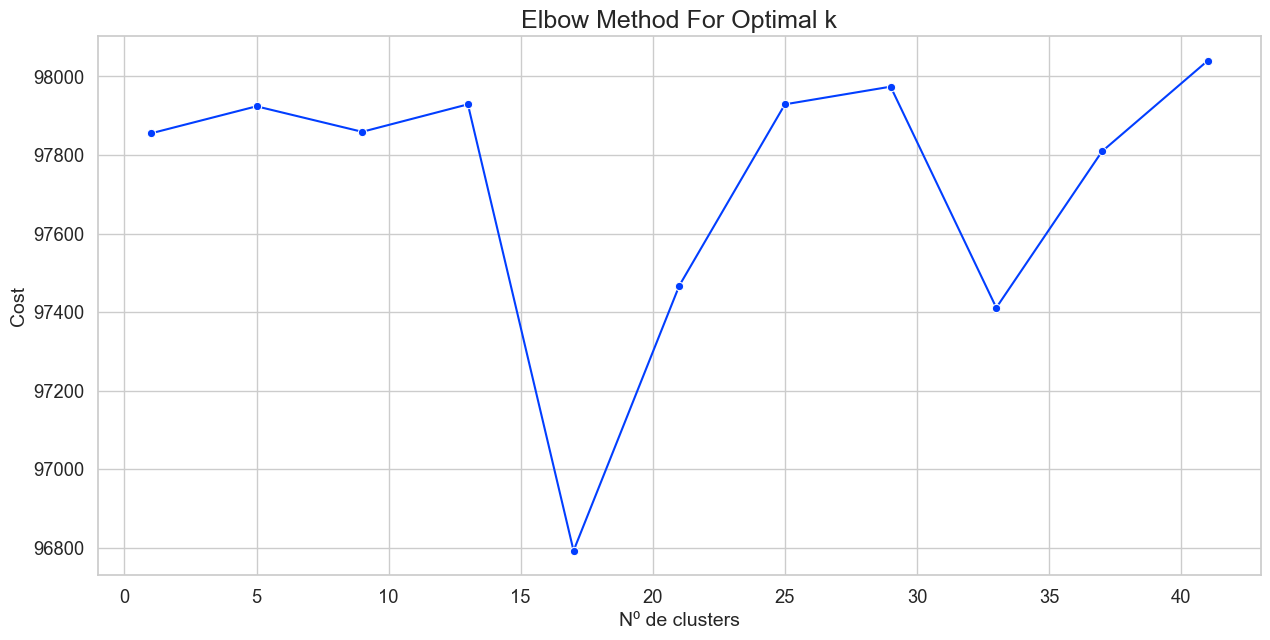

In [18]:
sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)
plt.figure(figsize=(15,7))

ax = sns.lineplot(x=K, y=cost, marker="o", dashes=False)
ax.set_title('Elbow Method For Optimal k', fontsize=18)
ax.set_xlabel('Nº de clusters', fontsize=14)
ax.set_ylabel('Cost', fontsize=14)

hoje = datetime.date.today()
plt.show()